In [ ]:
#Assignment based on Linear regression using python.
#Snehal Hon(145) ,Batch-T3

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Get dataset
df_price = pd.read_csv(r"d:\Downloads\car_price_dataset.csv")
df_price.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
# Describe data
df_price.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


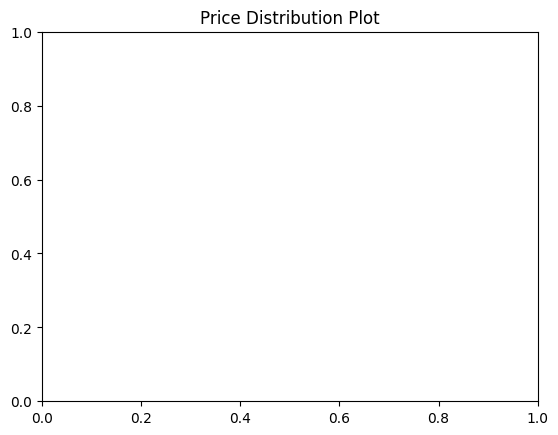

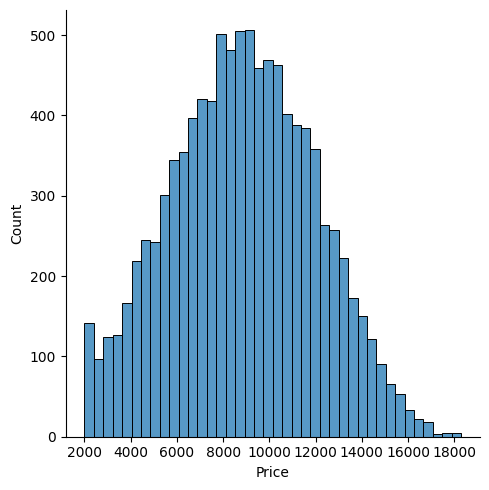

In [4]:
# Data distribution
plt.title('Price Distribution Plot')
sns.displot(df_price['Price'])
plt.show()

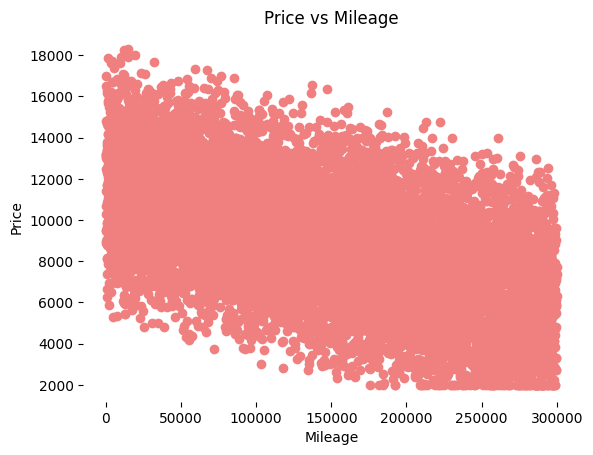

In [5]:
# Relationship between Salary and Experience
plt.scatter(df_price['Mileage'], df_price['Price'], color = 'lightcoral')
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.box(False)
plt.show()

In [6]:
# Assuming your DataFrame is named df
df_price = df_price[['Mileage', 'Price']]  # Selecting only relevant columns

# Drop missing values if any
df_price.dropna(inplace=True)


In [21]:
# Define the feature (X) and target variable (y)
X = df_price[['Mileage']]  # Independent variable (feature)
y = df_price['Price']      # Dependent variable (target)


In [22]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Initialize and Train Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Print the model's intercept (b0) and coefficient (b1)
print(f"Intercept: {regressor.intercept_}")   # This is the price when Mileage is zero
print(f"Coefficient: {regressor.coef_[0]}")  # This shows how Price changes with each unit increase in Mileage



Intercept: 11809.257878302731
Coefficient: -0.019939606518053016


In [24]:
# Make predictions on the training and testing sets
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [25]:
#Evaluate the model's performance using various metrics
print("Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test):.2f}")  # Average absolute error
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test):.2f}")    # Squared error, penalizing large mistakes
print(f"R² Score: {r2_score(y_test, y_pred_test):.2f}")  # How well the model explains variation in Price


Model Performance on Test Set:
Mean Absolute Error (MAE): 2089.73
Mean Squared Error (MSE): 6413212.32
R² Score: 0.30


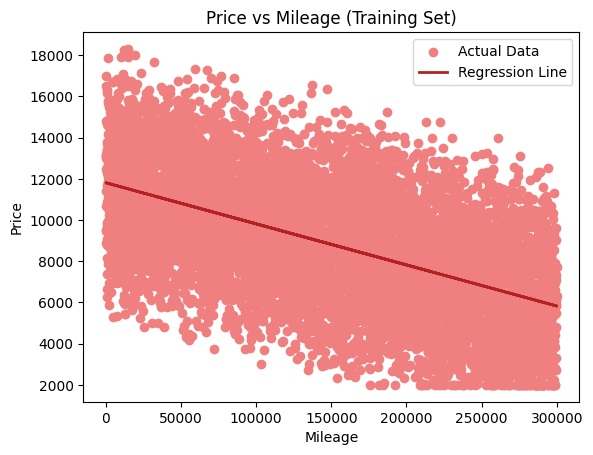

In [26]:
#Visualizing the regression line with training data
plt.scatter(X_train, y_train, color='lightcoral', label="Actual Data")  # Scatter plot of actual data points
plt.plot(X_train, y_pred_train, color='firebrick', linewidth=2, label="Regression Line")  # Regression line
plt.xlabel("Mileage")  # Label for X-axis
plt.ylabel("Price")    # Label for Y-axis
plt.title("Price vs Mileage (Training Set)")  # Plot title
plt.legend()  # Show legend for clarity
plt.show()  # Display the plot

In [13]:
# Splitting variables
X = df_price.iloc[:, :1]  # independent
y = df_price.iloc[:, 1:]  # dependent

In [14]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

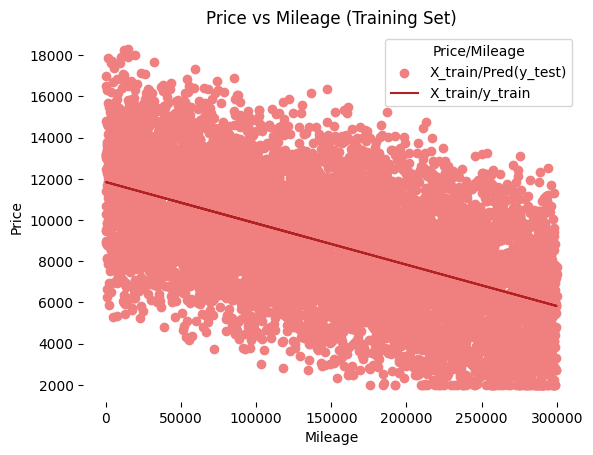

In [19]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Price vs Mileage (Training Set)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Price/Mileage', loc='best', facecolor='white')
plt.box(False)
plt.show()

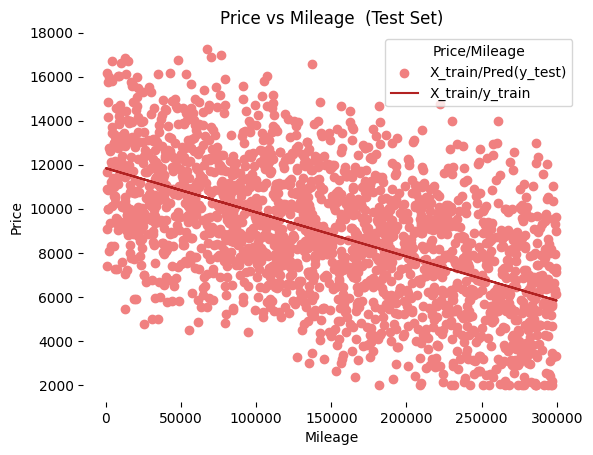

In [20]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Price vs Mileage  (Test Set)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Price/Mileage', loc='best', facecolor='white')
plt.box(False)
plt.show()